Here we provide our dataset for multi-label hate speech and abusive language detection in the Indonesian Twitter. The main dataset can be seen at re_dataset with labels information as follows:

HS : hate speech label;

**Abusive** : abusive language label;

**HS_Individual** : hate speech targeted to an individual;

**HS_Group** : hate speech targeted to a group;

**HS_Religion** : hate speech related to religion/creed;

**HS_Race** : hate speech related to race/ethnicity;

**HS_Physical** : hate speech related to physical/disability;

**HS_Gender** : hate speech related to gender/sexual orientation;

**HS_Gender** : hate related to other invective/slander;

**HS_Weak** : weak hate speech;

**HS_Moderate** : moderate hate speech;

**HS_Strong** : strong hate speech.

For each label, 1 means yes (tweets including that label), 0 mean no (tweets are not included in that label).

Due to the Twitter's Terms of Service, we do not provide the tweet ID. All username and URL in this dataset are changed into USER and URL.

For text normalization in our experiment, we built typo and slang words dictionaries named new_kamusalay.csv, that contain two columns (first columns are the typo and slang words, and the second one is the formal words). Here the examples of mapping:

beud --> banget
jgn --> jangan
loe --> kamu
Furthermore, we also built abusive lexicon list named abusive.csv that can be used for feature extraction.

In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv', encoding='latin-1')

In [3]:
df

,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0
1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0
4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0
13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0
13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df['Tweet'][7]

'Gue baru aja kelar re-watch Aldnoah Zero!!! paling kampret emang endingnya! 2 karakter utama cowonya kena friendzone bray! XD URL'

In [5]:
data_latihan = df['Tweet'].head(10)

In [6]:
data_latihan.to_csv('data_latihan.csv')

In [7]:
df = df.reset_index().rename(columns={'index':'id'})

In [8]:
df.columns

Index(['id', 'Tweet', 'HS', 'Abusive', 'HS_Individual', 'HS_Group',
       'HS_Religion', 'HS_Race', 'HS_Physical', 'HS_Gender', 'HS_Other',
       'HS_Weak', 'HS_Moderate', 'HS_Strong'],
      dtype='object')

**Check Type Data Tiap Kolom**

In [9]:
df.dtypes

id                int64
Tweet            object
HS                int64
Abusive           int64
HS_Individual     int64
HS_Group          int64
HS_Religion       int64
HS_Race           int64
HS_Physical       int64
HS_Gender         int64
HS_Other          int64
HS_Weak           int64
HS_Moderate       int64
HS_Strong         int64
dtype: object

**Check Jumlah Unique Values**

In [10]:
df.nunique()

id               13169
Tweet            13023
HS                   2
Abusive              2
HS_Individual        2
HS_Group             2
HS_Religion          2
HS_Race              2
HS_Physical          2
HS_Gender            2
HS_Other             2
HS_Weak              2
HS_Moderate          2
HS_Strong            2
dtype: int64

**Check Duplicate**

In [11]:
df.duplicated('Tweet').sum()

146

In [12]:
from collections import Counter

In [13]:
Counter(df['id']) == Counter(df['Tweet'])

False

In [14]:
df.loc[df.duplicated('Tweet')].sort_values(by='Tweet', ascending=True)

,id,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong
295,295,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
378,378,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
10254,10254,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
4254,4254,#GubernurZamanNow #GusIpulPuti2 #GanjarYasin1 ...,0,0,0,0,0,0,0,0,0,0,0,0
10829,10829,#Video Ritual Hindu ini bukan digelar di India...,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10988,10988,klik,0,0,0,0,0,0,0,0,0,0,0,0
11367,11367,masuknya Jokowi sebagai tokoh muslim yang berp...,0,0,0,0,0,0,0,0,0,0,0,0
1433,1433,"perempuan kaya lo mending mati aja deh, jelek ...",1,1,1,0,0,0,1,1,0,1,0,0
8544,8544,tangkap ahok dan klompok nya yg melakukan pema...,1,0,0,1,0,0,0,0,1,0,0,1


In [15]:
df = df.drop_duplicates('Tweet')

In [16]:
df.duplicated('Tweet').sum()

0

In [17]:
df['Tweet'][68]

'Lengserkan Jokowi Bangsat!!'

In [18]:
df.nunique()

id               13023
Tweet            13023
HS                   2
Abusive              2
HS_Individual        2
HS_Group             2
HS_Religion          2
HS_Race              2
HS_Physical          2
HS_Gender            2
HS_Other             2
HS_Weak              2
HS_Moderate          2
HS_Strong            2
dtype: int64

**Check Jumlah NULL Value**

In [19]:
df.isna().sum()

id               0
Tweet            0
HS               0
Abusive          0
HS_Individual    0
HS_Group         0
HS_Religion      0
HS_Race          0
HS_Physical      0
HS_Gender        0
HS_Other         0
HS_Weak          0
HS_Moderate      0
HS_Strong        0
dtype: int64

In [20]:
kamus_alay = pd.read_csv('new_kamusalay.csv', encoding='latin-1')

In [21]:
kamus_alay

,anakjakartaasikasik,anak jakarta asyik asyik
0,pakcikdahtua,pak cik sudah tua
1,pakcikmudalagi,pak cik muda lagi
2,t3tapjokowi,tetap jokowi
3,3x,tiga kali
4,aamiin,amin
...,...,...
15161,mendikbud,menteri pendidikan dan kebudayaan
15162,mendag,menteri perdagangan
15163,menaker,menteri tenaga kerja
15164,memetwit,mentwit


In [22]:
data_abusive = pd.read_csv('abusive.csv')

In [117]:
data_abusive

,ABUSIVE
0,alay
1,ampas
2,buta
3,keparat
4,anjing
...,...
120,rezim
121,sange
122,serbet
123,sipit


In [24]:
df['Tweet'][13166]

"USER Hati hati bisu :( .g\\n\\nlagi bosan huft \\xf0\\x9f\\x98\\xaa'"

**Membuat Kolom Baru Untuk Total Karakter (total_char) dan Total Kata (total_word)**

In [25]:
df['total_word'] = df['Tweet'].apply(lambda x: len(x.split()))

In [26]:
df['total_char'] = df['Tweet'].apply(len)

In [27]:
df

,id,Tweet,HS,Abusive,HS_Individual,HS_Group,HS_Religion,HS_Race,HS_Physical,HS_Gender,HS_Other,HS_Weak,HS_Moderate,HS_Strong,total_word,total_char
0,0,- disaat semua cowok berusaha melacak perhatia...,1,1,1,0,0,0,0,0,1,1,0,0,25,138
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,0,1,0,0,0,0,0,0,0,0,0,0,21,120
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",0,0,0,0,0,0,0,0,0,0,0,0,37,254
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,0,0,0,0,0,0,0,0,0,0,0,0,14,75
4,4,USER USER Kaum cebong kapir udah keliatan dong...,1,1,0,1,1,0,0,0,0,0,1,0,14,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,1,1,1,0,0,0,1,0,0,1,0,0,10,61
13165,13165,USER Kasur mana enak kunyuk',0,1,0,0,0,0,0,0,0,0,0,0,5,28
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,0,0,0,0,0,0,0,0,0,0,0,0,9,62
13167,13167,USER USER USER USER Bom yang real mudah terdet...,0,0,0,0,0,0,0,0,0,0,0,0,22,135


**Membuat Tabel Berisi ID dan Kata-Kata dari Tweet Saja**

In [28]:
data_tweet = df[['id','Tweet','total_char','total_word']]

In [29]:
data_tweet

,id,Tweet,total_char,total_word
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14
...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10
13165,13165,USER Kasur mana enak kunyuk',28,5
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22


**Membersihkan Text dari Tweet yang Berisi USER, RT, dan URL**

In [30]:
data_tweet['Tweet'][3].replace("RT"," ").replace("USER"," ").replace("URL"," ")

"    AKU ITU AKU\\n\\nKU TAU MATAMU SIPIT TAPI DILIAT DARI MANA ITU AKU'"

In [31]:
data_tweet['new_tweet'] = df['Tweet'].apply (lambda x : x.replace("USER", "").replace("RT", ""))

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\1324308831.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['new_tweet'] = df['Tweet'].apply (lambda x : x.replace("USER", "").replace("RT", ""))


In [32]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,- disaat semua cowok berusaha melacak perhatia...
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,: siapa yang telat ngasih tau elu?edan sarap...
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,AKU ITU AKU\n\nKU TAU MATAMU SIPIT TAPI DILI...
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,Kaum cebong kapir udah keliatan dongoknya da...
...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu. congor lu yg seka...
13165,13165,USER Kasur mana enak kunyuk',28,5,Kasur mana enak kunyuk'
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,Hati hati bisu :( .g\n\nlagi bosan huft \xf0\...
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,Bom yang real mudah terdeteksi bom yang te...


**Menormalisasi Seluruh Text**

In [33]:
data_tweet['Tweet'][3].lower()

"user user aku itu aku\\n\\nku tau matamu sipit tapi diliat dari mana itu aku'"

In [34]:
data_tweet['new_tweet'] = df['Tweet'].apply (lambda x : x.replace("USER", "").replace("RT", "").replace("URL", "").lower())

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\3135443223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['new_tweet'] = df['Tweet'].apply (lambda x : x.replace("USER", "").replace("RT", "").replace("URL", "").lower())


In [35]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,- disaat semua cowok berusaha melacak perhatia...
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,: siapa yang telat ngasih tau elu?edan sarap...
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,"41. kadang aku berfikir, kenapa aku tetap perc..."
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku\n\nku tau matamu sipit tapi dili...
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya da...
...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu. congor lu yg seka...
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk'
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu :( .g\n\nlagi bosan huft \xf0\...
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang te...


**Menghilangkan Seluruh Angka dan Punctuation dalam Kalimat**

In [36]:
data_tweet['new_tweet'] = data_tweet['new_tweet'].astype(str).str.replace(r'[^a-zA-Z]', ' ', regex=True)

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\4179179225.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['new_tweet'] = data_tweet['new_tweet'].astype(str).str.replace(r'[^a-zA-Z]', ' ', regex=True)


In [37]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatia...
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap...
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap perc...
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi dili...
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya da...
...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg seka...
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf ...
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang te...


In [38]:
data_tweet['new_tweet_splitted'] = data_tweet['new_tweet'].apply (lambda x : x.split())

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\1189139934.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['new_tweet_splitted'] = data_tweet['new_tweet'].apply (lambda x : x.split())


In [39]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,new_tweet_splitted
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatia...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap...,"[siapa, yang, telat, ngasih, tau, elu, edan, s..."
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap perc...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi dili...,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta..."
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya da...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]"
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf ...,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x..."
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang te...,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [40]:
from collections import Counter

In [41]:
Counter(data_tweet['new_tweet'][3245])

Counter({' ': 12,
         'c': 1,
         'a': 4,
         'r': 2,
         'd': 3,
         'u': 5,
         'n': 5,
         'g': 2,
         'i': 2,
         'l': 2,
         'k': 3,
         'e': 1,
         'z': 1,
         'm': 1,
         'o': 1,
         'p': 1})

In [42]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,new_tweet_splitted
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatia...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap...,"[siapa, yang, telat, ngasih, tau, elu, edan, s..."
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap perc...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi dili...,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta..."
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya da...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg seka...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]"
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf ...,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x..."
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang te...,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [43]:
data_tweet['new_tweet'][0]

'  disaat semua cowok berusaha melacak perhatian gue  loe lantas remehkan perhatian yg gue kasih khusus ke elo  basic elo cowok bego       '

**Menghilangkan WhiteSpace di Awal dan Akhir String**

In [44]:
data_tweet['new_tweet'] = data_tweet['new_tweet'].apply(lambda x:x.strip())

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\1471472647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['new_tweet'] = data_tweet['new_tweet'].apply(lambda x:x.strip())


In [45]:
data_tweet['new_tweet'][3]

'aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku'

In [46]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,new_tweet_splitted
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s..."
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap percaya ...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe..."
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi diliat...,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta..."
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg sekat...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg..."
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]"
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf x...,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x..."
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang terkub...,"[bom, yang, real, mudah, terdeteksi, bom, yang..."


In [47]:
data_tweet['total_char_new'] = data_tweet['new_tweet'].apply(len)

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\1418344611.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['total_char_new'] = data_tweet['new_tweet'].apply(len)


In [48]:
data_tweet['total_word_new'] = data_tweet['new_tweet'].apply(lambda x: len(x.split()))

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\3754972066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['total_word_new'] = data_tweet['new_tweet'].apply(lambda x: len(x.split()))


In [49]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,new_tweet_splitted,total_char_new,total_word_new
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...",129,21
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...",105,19
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap percaya ...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",250,37
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi diliat...,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta...",64,14
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",78,12
...,...,...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg sekat...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",55,9
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",22,4
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf x...,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x...",56,13
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang terkub...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",114,18


**Mengecek Apakah Kata di new_tweet Berada di Dalam Kamus Abusive**

In [50]:
abusive_words = []
with open('abusive.csv', 'r') as f:
    for x in f:
        if ";" in x:
            continue
        elif len(x.strip())>0:
            abusive_words.append(x.strip())

In [51]:
abusive_words

['ABUSIVE',
 'alay',
 'ampas',
 'buta',
 'keparat',
 'anjing',
 'anjir',
 'babi',
 'bacot',
 'bajingan',
 'banci',
 'bandot',
 'buaya',
 'bangkai',
 'bangsat',
 'bego',
 'bejat',
 'bencong',
 'berak',
 'bisu',
 'celeng',
 'jancuk',
 'bodoh',
 'berengsek',
 'budek',
 'burik',
 'jamban',
 'cocot',
 'congor',
 'culun',
 'cupu',
 'dongok',
 'dungu',
 'edan',
 'tai',
 'ngewe',
 'geblek',
 'gembel',
 'gila',
 'goblok',
 'iblis',
 'idiot',
 'jablay',
 'jembud',
 'jembut',
 'jijik',
 'kacrut',
 'kafir',
 'modar',
 'kampang',
 'kampret',
 'kampungan',
 'kimak',
 'kontol',
 'kunti',
 'tuyul',
 'kunyuk',
 'mampus',
 'memek',
 'monyet',
 'najis',
 'nete',
 'ngentot',
 'noob',
 'pecun',
 'perek',
 'sampah',
 'sarap',
 'setan',
 'silit',
 'bokong',
 'sinting',
 'sompret',
 'sontoloyo',
 'terkutuk',
 'titit',
 'pantat',
 'tolol',
 'udik',
 'antek',
 'asing',
 'ateis',
 'sitip',
 'autis',
 'picek',
 'ayam kampus',
 'bani kotak',
 'bispak',
 'bisyar',
 'bokep',
 'bong',
 'cacat',
 'cct',
 'cebong',
 't

In [52]:
data_tweet['words'] = data_tweet['new_tweet'].apply(lambda x: x.split())

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\222873258.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['words'] = data_tweet['new_tweet'].apply(lambda x: x.split())


In [53]:
from tqdm import tqdm

In [54]:
data_tweet['words'].shape

(13023,)

In [55]:
unique_words = []
for sentence in data_tweet['words']:
    for word in sentence:
        unique_words.append(word)

In [56]:
unique_words = list(set(unique_words))

In [57]:
len(unique_words)

27387

In [58]:
word_to_index = {}
for index,word in enumerate(unique_words):
    word_to_index[word] = index

In [59]:
word_to_index

{'bobotnya': 0,
 'dipantau': 1,
 'oiyaaa': 2,
 'ceced': 3,
 'opoo': 4,
 'aqil': 5,
 'liberal': 6,
 'njahat': 7,
 'bijb': 8,
 'youngji': 9,
 'berpengaruh': 10,
 'emaka': 11,
 'bla': 12,
 'diparkirin': 13,
 'honor': 14,
 'swot': 15,
 'qurayza': 16,
 'lom': 17,
 'mengantuk': 18,
 'spiritgn': 19,
 'berdampingan': 20,
 'zein': 21,
 'camat': 22,
 'pilgu': 23,
 'cengk': 24,
 'divonis': 25,
 'soundtrack': 26,
 'wiranti': 27,
 'lambang': 28,
 'ihklas': 29,
 'cukong': 30,
 'stagan': 31,
 'liputan': 32,
 'bokepbarat': 33,
 'tren': 34,
 'tuliskan': 35,
 'gim': 36,
 'topup': 37,
 'soemitro': 38,
 'lihat': 39,
 'ekaristi': 40,
 'stray': 41,
 'diputusin': 42,
 'mengentaskan': 43,
 'alana': 44,
 'sepertinya': 45,
 'selimutin': 46,
 'onta': 47,
 'tegal': 48,
 'nbegitulah': 49,
 'bungee': 50,
 'six': 51,
 'hiu': 52,
 'iyo': 53,
 'raden': 54,
 'absurd': 55,
 'camp': 56,
 'phoerange': 57,
 'ndasmu': 58,
 'tantegirang': 59,
 'nikitakruschev': 60,
 'dahak': 61,
 'rokok': 62,
 'sukano': 63,
 'harus': 64,
 'm

In [60]:
index_to_word = {}
for word,index in word_to_index.items():
    index_to_word[index] = word

In [61]:
index_to_word

{0: 'bobotnya',
 1: 'dipantau',
 2: 'oiyaaa',
 3: 'ceced',
 4: 'opoo',
 5: 'aqil',
 6: 'liberal',
 7: 'njahat',
 8: 'bijb',
 9: 'youngji',
 10: 'berpengaruh',
 11: 'emaka',
 12: 'bla',
 13: 'diparkirin',
 14: 'honor',
 15: 'swot',
 16: 'qurayza',
 17: 'lom',
 18: 'mengantuk',
 19: 'spiritgn',
 20: 'berdampingan',
 21: 'zein',
 22: 'camat',
 23: 'pilgu',
 24: 'cengk',
 25: 'divonis',
 26: 'soundtrack',
 27: 'wiranti',
 28: 'lambang',
 29: 'ihklas',
 30: 'cukong',
 31: 'stagan',
 32: 'liputan',
 33: 'bokepbarat',
 34: 'tren',
 35: 'tuliskan',
 36: 'gim',
 37: 'topup',
 38: 'soemitro',
 39: 'lihat',
 40: 'ekaristi',
 41: 'stray',
 42: 'diputusin',
 43: 'mengentaskan',
 44: 'alana',
 45: 'sepertinya',
 46: 'selimutin',
 47: 'onta',
 48: 'tegal',
 49: 'nbegitulah',
 50: 'bungee',
 51: 'six',
 52: 'hiu',
 53: 'iyo',
 54: 'raden',
 55: 'absurd',
 56: 'camp',
 57: 'phoerange',
 58: 'ndasmu',
 59: 'tantegirang',
 60: 'nikitakruschev',
 61: 'dahak',
 62: 'rokok',
 63: 'sukano',
 64: 'harus',
 65

In [62]:
len(word_to_index) == len(index_to_word)

True

In [63]:
for word in abusive_words:
    try:
        word_to_index[word]
    except KeyError:
        word_to_index[word] = len(word_to_index) 

In [64]:
len(word_to_index)

27395

In [65]:
index_to_word = {}
for word,index in word_to_index.items():
    index_to_word[index] = word

In [66]:
len(word_to_index) == len(index_to_word)

True

In [67]:
new_df_words = []
for sentence in data_tweet['words']:
    new_sentence = []
    for word in sentence:
        new_sentence.append(word_to_index.get(word, -1))
    new_df_words.append(new_sentence)

In [68]:
new_df_words

[[19406,
  3476,
  16270,
  24372,
  20709,
  25972,
  14555,
  5861,
  8294,
  19957,
  25972,
  17013,
  14555,
  10223,
  10823,
  15051,
  169,
  14551,
  169,
  16270,
  24047],
 [10037,
  9273,
  14890,
  2111,
  23804,
  4598,
  86,
  27131,
  14555,
  12331,
  15203,
  6824,
  12749,
  776,
  22568,
  10037,
  26517,
  8138,
  21013],
 [24117,
  8477,
  8162,
  15358,
  8477,
  9206,
  22270,
  4530,
  17787,
  22915,
  8477,
  1883,
  9755,
  11486,
  15335,
  24117,
  8477,
  23349,
  17787,
  16276,
  5568,
  8477,
  11238,
  11591,
  13211,
  17418,
  20528,
  11591,
  227,
  5901,
  2786,
  16372,
  5199,
  11591,
  8477,
  24172,
  17836],
 [8477,
  16276,
  8477,
  5986,
  14430,
  23804,
  399,
  17314,
  2468,
  13321,
  17249,
  2452,
  16276,
  8477],
 [3413,
  25613,
  9543,
  10064,
  21039,
  10364,
  17249,
  20428,
  19322,
  24393,
  16026,
  2205],
 [1645,
  4989,
  529,
  21111,
  14105,
  1463,
  15472,
  1463,
  1463,
  14105,
  1463,
  15472,
  1463,
  146

In [69]:
new_abusive_words = [word_to_index.get(word, -1) for word in abusive_words]

In [70]:
jumlah_abusive_words_column = []
for row in tqdm(new_df_words):
    jumlah_abusive_words = 0 
    for abusive_word in new_abusive_words:
        if abusive_word in row:
            jumlah_abusive_words = jumlah_abusive_words + 1
    jumlah_abusive_words_column.append(jumlah_abusive_words)

100%|█████████████████████████████████████████████████████████████████████████| 13023/13023 [00:00<00:00, 39390.39it/s]


In [71]:
jumlah_abusive_words_column

[1,
 2,
 0,
 1,
 2,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 2,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 3,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 4,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 3,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 2,
 0,
 0,


In [72]:
data_tweet['jumlah_abusive_words'] = jumlah_abusive_words_column

C:\Users\Risky Maulana\AppData\Local\Temp\ipykernel_6164\3973255442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_tweet['jumlah_abusive_words'] = jumlah_abusive_words_column


In [73]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,new_tweet_splitted,total_char_new,total_word_new,words,jumlah_abusive_words
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...",129,21,"[disaat, semua, cowok, berusaha, melacak, perh...",1
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...",105,19,"[siapa, yang, telat, ngasih, tau, elu, edan, s...",2
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap percaya ...,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",250,37,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",0
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi diliat...,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta...",64,14,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta...",1
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...",78,12,"[kaum, cebong, kapir, udah, keliatan, dongokny...",2
...,...,...,...,...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg sekat...,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",55,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",1
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,"[kasur, mana, enak, kunyuk]",22,4,"[kasur, mana, enak, kunyuk]",1
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf x...,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x...",56,13,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x...",1
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang terkub...,"[bom, yang, real, mudah, terdeteksi, bom, yang...",114,18,"[bom, yang, real, mudah, terdeteksi, bom, yang...",0


In [74]:
data_tweet = data_tweet.drop('new_tweet_splitted', axis=1)

In [75]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,total_char_new,total_word_new,words,jumlah_abusive_words
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,129,21,"[disaat, semua, cowok, berusaha, melacak, perh...",1
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap gue...,105,19,"[siapa, yang, telat, ngasih, tau, elu, edan, s...",2
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap percaya ...,250,37,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",0
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi diliat...,64,14,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta...",1
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya dari...,78,12,"[kaum, cebong, kapir, udah, keliatan, dongokny...",2
...,...,...,...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg sekat...,55,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",1
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,22,4,"[kasur, mana, enak, kunyuk]",1
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf x...,56,13,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x...",1
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang terkub...,114,18,"[bom, yang, real, mudah, terdeteksi, bom, yang...",0


In [76]:
data_tweet['new_tweet'][3]

'aku itu aku n nku tau matamu sipit tapi diliat dari mana itu aku'

In [77]:
data_tweet.to_excel('data_tweet_abusive.xlsx')

In [78]:
is_abusive_sentence = []
for sentence in data_tweet['jumlah_abusive_words']:
    if sentence > 0:
        is_abusive_sentence.append("Kalimat Abusive")
    else:
        is_abusive_sentence.append("Bukan Kalimat Abusive")

In [79]:
data_tweet['is_abusive_sentence'] = is_abusive_sentence

In [80]:
data_tweet

,id,Tweet,total_char,total_word,new_tweet,total_char_new,total_word_new,words,jumlah_abusive_words,is_abusive_sentence
0,0,- disaat semua cowok berusaha melacak perhatia...,138,25,disaat semua cowok berusaha melacak perhatian ...,129,21,"[disaat, semua, cowok, berusaha, melacak, perh...",1,Kalimat Abusive
1,1,RT USER: USER siapa yang telat ngasih tau elu?...,120,21,siapa yang telat ngasih tau elu edan sarap gue...,105,19,"[siapa, yang, telat, ngasih, tau, elu, edan, s...",2,Kalimat Abusive
2,2,"41. Kadang aku berfikir, kenapa aku tetap perc...",254,37,kadang aku berfikir kenapa aku tetap percaya ...,250,37,"[kadang, aku, berfikir, kenapa, aku, tetap, pe...",0,Bukan Kalimat Abusive
3,3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,75,14,aku itu aku n nku tau matamu sipit tapi diliat...,64,14,"[aku, itu, aku, n, nku, tau, matamu, sipit, ta...",1,Kalimat Abusive
4,4,USER USER Kaum cebong kapir udah keliatan dong...,89,14,kaum cebong kapir udah keliatan dongoknya dari...,78,12,"[kaum, cebong, kapir, udah, keliatan, dongokny...",2,Kalimat Abusive
...,...,...,...,...,...,...,...,...,...,...
13164,13164,USER jangan asal ngomong ndasmu. congor lu yg ...,61,10,jangan asal ngomong ndasmu congor lu yg sekat...,55,9,"[jangan, asal, ngomong, ndasmu, congor, lu, yg...",1,Kalimat Abusive
13165,13165,USER Kasur mana enak kunyuk',28,5,kasur mana enak kunyuk,22,4,"[kasur, mana, enak, kunyuk]",1,Kalimat Abusive
13166,13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...,62,9,hati hati bisu g n nlagi bosan huft xf x...,56,13,"[hati, hati, bisu, g, n, nlagi, bosan, huft, x...",1,Kalimat Abusive
13167,13167,USER USER USER USER Bom yang real mudah terdet...,135,22,bom yang real mudah terdeteksi bom yang terkub...,114,18,"[bom, yang, real, mudah, terdeteksi, bom, yang...",0,Bukan Kalimat Abusive


**Top 5 Abusive Word**

In [81]:
calculate_kemunculan_abusive_words = {}

for new_abusive_word in tqdm(new_abusive_words):
    for sentence in new_df_words:
        if new_abusive_word in sentence:
            try:
                calculate_kemunculan_abusive_words[new_abusive_word] += 1
            except KeyError:
                calculate_kemunculan_abusive_words[new_abusive_word] = 1

100%|███████████████████████████████████████████████████████████████████████████████| 126/126 [00:00<00:00, 266.29it/s]


In [82]:
calculate_kemunculan_abusive_words

{1401: 20,
 16350: 18,
 10139: 114,
 20582: 40,
 24809: 130,
 22427: 122,
 7139: 170,
 4470: 107,
 26393: 136,
 9501: 124,
 7263: 5,
 20388: 61,
 20173: 50,
 3629: 65,
 24047: 113,
 8103: 29,
 11376: 48,
 16449: 10,
 6281: 71,
 15778: 18,
 8546: 26,
 26175: 81,
 25552: 1,
 1496: 75,
 3052: 18,
 5553: 49,
 22704: 60,
 2102: 60,
 341: 39,
 4141: 27,
 24393: 13,
 4524: 162,
 86: 58,
 11134: 145,
 16739: 43,
 20427: 43,
 6791: 50,
 13227: 89,
 3587: 137,
 18689: 57,
 22575: 96,
 24631: 42,
 3844: 9,
 3775: 44,
 14773: 36,
 8712: 262,
 3829: 18,
 18484: 53,
 7614: 174,
 23517: 45,
 17919: 122,
 15938: 35,
 15553: 18,
 13574: 103,
 16883: 60,
 17854: 108,
 18210: 134,
 5247: 59,
 23994: 39,
 14182: 108,
 12132: 17,
 891: 28,
 10326: 27,
 11918: 87,
 27131: 64,
 9398: 92,
 10791: 35,
 603: 15,
 11215: 54,
 25418: 14,
 24736: 42,
 4448: 33,
 7540: 58,
 9426: 32,
 25635: 132,
 1733: 51,
 1028: 229,
 22755: 388,
 14632: 31,
 4110: 6,
 21863: 25,
 9857: 50,
 22109: 7,
 3728: 1,
 11904: 19,
 16216

In [83]:
words = [word for sentence in new_df_words for word in sentence]

In [84]:
from collections import Counter
Counter(words)

Counter({19406: 7,
         3476: 394,
         16270: 34,
         24372: 32,
         20709: 2,
         25972: 20,
         14555: 486,
         5861: 97,
         8294: 10,
         19957: 2,
         17013: 2928,
         10223: 132,
         10823: 44,
         15051: 693,
         169: 32,
         14551: 2,
         24047: 119,
         10037: 229,
         9273: 1992,
         14890: 11,
         2111: 22,
         23804: 270,
         4598: 30,
         86: 59,
         27131: 66,
         12331: 5,
         15203: 670,
         6824: 1,
         12749: 1,
         776: 1,
         22568: 768,
         26517: 13,
         8138: 1,
         21013: 706,
         24117: 41,
         8477: 723,
         8162: 8,
         15358: 178,
         9206: 120,
         22270: 97,
         4530: 409,
         17787: 127,
         22915: 103,
         1883: 165,
         9755: 32,
         11486: 7,
         15335: 155,
         23349: 68,
         16276: 1710,
         5568: 1,
         1

In [85]:
pd.DataFrame(words).mode()

,0
0,1463


In [86]:
top_5_abusive = sorted(calculate_kemunculan_abusive_words.items(), key=lambda x:x[1], reverse=True)[:5]

In [88]:
top_5_abusive

[(25613, 455), (22755, 388), (25566, 335), (5285, 327), (8712, 262)]

In [115]:
index_to_word = {}
for x in top_5_abusive:
    index_to_wordx[x[0]] = word

TypeError: 'tuple' object does not support item assignment

In [116]:
index_to_word

{}

In [90]:
top_5 = pd.DataFrame(top_5_abusive, columns=['Index', 'Freq'])

In [91]:
top_5

,Index,Freq
0,25613,455
1,22755,388
2,25566,335
3,5285,327
4,8712,262


**Visualisasi Data**

ValueError: context must be in paper, notebook, talk, poster

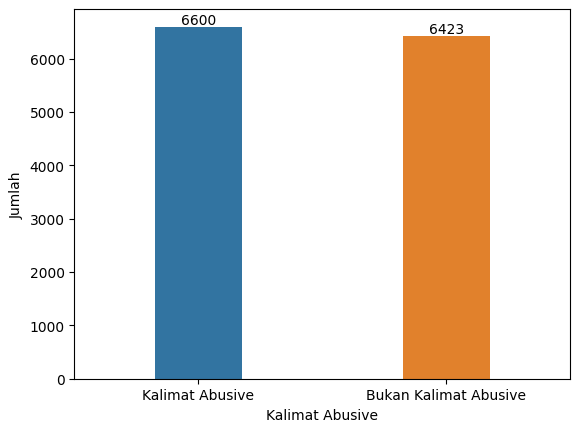

In [122]:
vis_data_tweet = sns.countplot(data_tweet, x="is_abusive_sentence", width = 0.35)
vis_data_tweet.set(xlabel= "Kalimat Abusive", ylabel="Jumlah")
vis_data_tweet.bar_label(vis_data_tweet.containers[0])
sns.set("whitegrid")

[Text(0, 0, '6423'),
 Text(0, 0, '5350'),
 Text(0, 0, '992'),
 Text(0, 0, '200'),
 Text(0, 0, '45'),
 Text(0, 0, '7'),
 Text(0, 0, '3'),
 Text(0, 0, '2'),
 Text(0, 0, '1')]

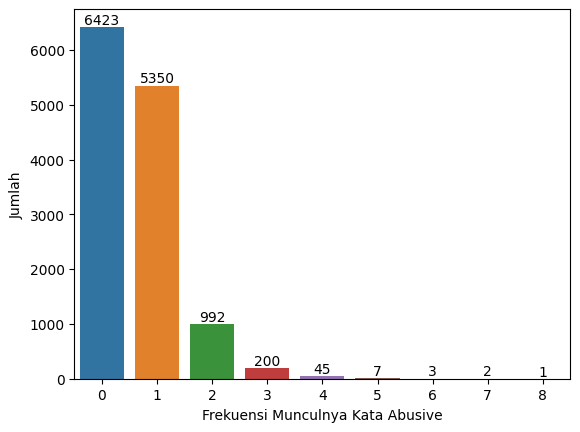

In [102]:
vis_data_tweet = sns.countplot(data_tweet, x="jumlah_abusive_words")
vis_data_tweet.set(xlabel= "Frekuensi Munculnya Kata Abusive", ylabel="Jumlah")
vis_data_tweet.bar_label(vis_data_tweet.containers[0])

In [94]:
data_tweet[['total_word_new', 'jumlah_abusive_words']].corr()

,total_word_new,jumlah_abusive_words
total_word_new,1.000000,0.038726
jumlah_abusive_words,0.038726,1.000000


<AxesSubplot: xlabel='jumlah_abusive_words', ylabel='total_word_new'>

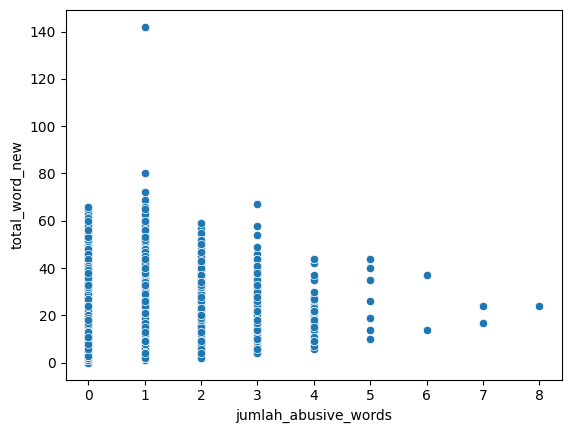

In [96]:
sns.scatterplot(y = data_tweet['total_word_new'], x =data_tweet['jumlah_abusive_words'])